In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy import integrate
import matplotlib as mpl
from scipy import interpolate
import time

from ABM_package import *

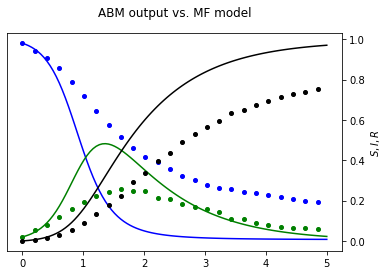

In [5]:
ri = 0.1
rr = ri/10.0
rm = 1.0

T_end = 5.0

s0 = 0.49
i0 = 0.01
r0 = 0

N = s0 + i0 + r0

t = np.linspace(0,T_end/rr,100)

SIR_y = ODE_sim(np.array([ri*N,rr]),SIR_ODE,t,np.array([s0/N,i0/N,r0/N]))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(rr*t,SIR_y[0,:],'b-',label="S")
ax.plot(rr*t,SIR_y[1,:],'g-',label="I")
ax.plot(rr*t,SIR_y[2,:],'k-',label="R")

atit = ax.set_title("ABM output vs. MF model")
atit.set_position((0.5,1.05))
ax.set_ylabel("$S,I,R$")
ax.yaxis.tick_right()

S,I,R,t,A_list,_ = SIR_ABM(ri,rr,rm,T_end)

ax.plot(rr*t[::4],S[::4],'b.',markersize=8)
ax.plot(rr*t[::4],I[::4],'g.',markersize=8)
ax.plot(rr*t[::4],R[::4],'k.',markersize=8)